# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

# Importing Dataset

In [3]:
wine_data = pd.read_csv("winequality-red.csv")

In [4]:
wine_data.head(6)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine_data.shape

(1599, 12)

# Data Analysis

In [6]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
wine_data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [8]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Data Visualization

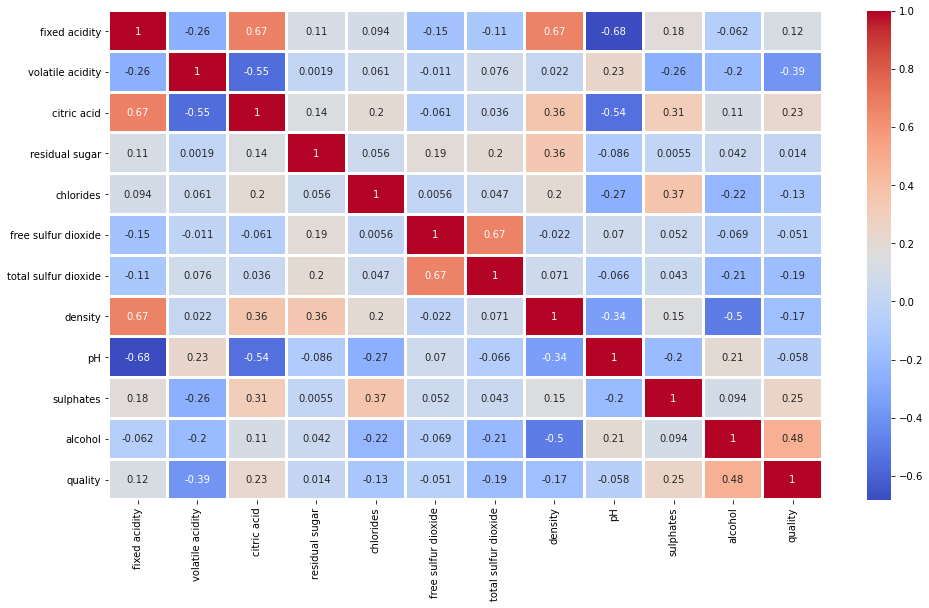

In [10]:
plt.figure(figsize=(16,9))
sns.heatmap(wine_data.corr(), annot = True, cmap ='coolwarm', linewidths=2)

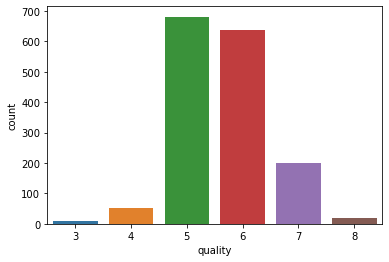

In [11]:
sns.countplot(wine_data['quality'])

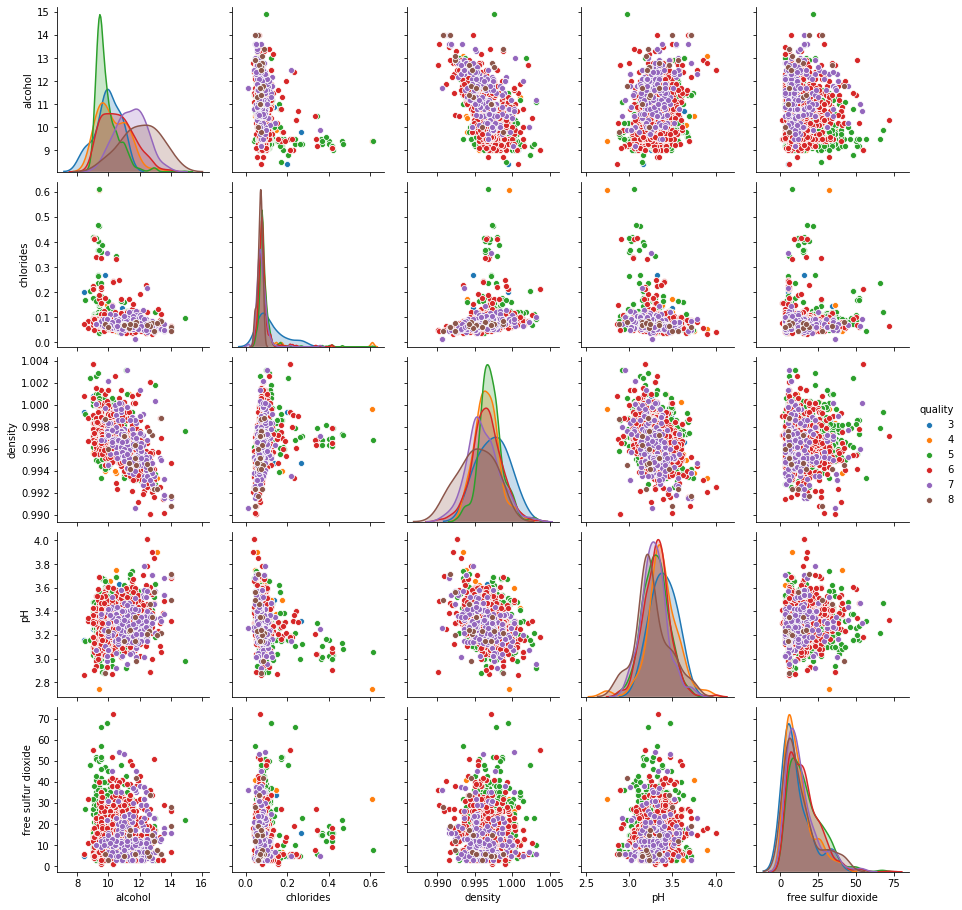

In [12]:
sns.pairplot(wine_data,hue='quality', vars=['alcohol','chlorides','density','pH','free sulfur dioxide'])

# Data Splitting

In [13]:
X = wine_data.iloc[:, 0:-1]
y = wine_data.iloc[:,-1]

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=51)
X_train.shape

(1279, 11)

# Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

# Machine Learning Model

## Logistic Regression Model

In [25]:
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(random_state=0)
classifier1.fit(X_train_sc,y_train)
print("Score : ",classifier1.score(X_train_sc,y_train))
y_pred_lr = classifier1.predict(X_test_sc)

Score :  0.6090695856137608


C:\Users\welcome\Desktop\ajn\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy Score of Logistic:",accuracy_score(y_test,y_pred_lr))
print("Classification Report of Logistic: ")
print(classification_report(y_test,y_pred_lr))

Accuracy Score of Logistic: 0.5875
Classification Report of Logistic: 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        14
           5       0.65      0.71      0.68       137
           6       0.54      0.61      0.58       129
           7       0.50      0.35      0.41        34
           8       0.00      0.00      0.00         5

    accuracy                           0.59       320
   macro avg       0.28      0.28      0.28       320
weighted avg       0.55      0.59      0.57       320



C:\Users\welcome\Desktop\ajn\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Random Forest Classifier and its accuracy_score

In [27]:
from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier(n_estimators=80, criterion='entropy', random_state=0)
classifier2.fit(X_train,y_train)
print("Score : ",classifier2.score(X_train,y_train))
y_pred_forest = classifier2.predict(X_test)

Score :  1.0


In [28]:
print("Accuracy Score of Logistic:",accuracy_score(y_test,y_pred_forest))
print("Classification Report of Logistic: ")
print(classification_report(y_test,y_pred_forest))
print(y_pred_forest)

Accuracy Score of Logistic: 0.6875
Classification Report of Logistic: 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        14
           5       0.73      0.71      0.72       137
           6       0.64      0.78      0.71       129
           7       0.78      0.62      0.69        34
           8       1.00      0.20      0.33         5

    accuracy                           0.69       320
   macro avg       0.53      0.38      0.41       320
weighted avg       0.67      0.69      0.67       320

[5 6 5 7 6 6 5 5 5 6 6 5 5 5 5 5 5 7 5 5 5 5 6 7 5 6 6 7 5 6 6 7 6 5 5 5 6
 5 6 5 6 6 6 5 6 5 5 6 5 5 6 3 6 6 6 5 6 5 5 6 6 6 5 6 7 6 5 5 5 6 5 5 6 6
 6 6 6 5 6 6 6 7 6 7 7 6 6 5 6 6 5 5 5 6 6 5 6 5 5 5 6 6 6 6 5 5 5 5 6 6 5
 6 6 6 6 8 6 5 5 5 7 5 6 6 5 6 5 6 5 5 5 5 6 5 6 5 6 6 6 6 6 5 5 5 5 6 7 5
 5 6 5 5 6 5 5 6 5 5 5 6 5 5 6 6 6 6 6 6 6 6 6 7 5 6 6 6 6 5 6 5 6 7 7 6 6
 6 6 5 5 6 

## K-Nearest Neighbours and its accuracy_score

In [29]:
from sklearn.neighbors import KNeighborsClassifier
classifier3 = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = 2)
classifier3.fit(X_train, y_train)
print("Score : ",classifier3.score(X_train,y_train))
y_pred_knn = classifier3.predict(X_test)

Score :  0.6442533229085223


In [30]:
print("Accuracy Score of KNN:",accuracy_score(y_test,y_pred_knn))
print("Classification Report of KNN: ")
print(classification_report(y_test,y_pred_knn))

Accuracy Score of KNN: 0.540625
Classification Report of KNN: 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        14
           5       0.56      0.73      0.63       137
           6       0.52      0.50      0.51       129
           7       0.53      0.24      0.33        34
           8       0.00      0.00      0.00         5

    accuracy                           0.54       320
   macro avg       0.27      0.24      0.25       320
weighted avg       0.51      0.54      0.51       320



C:\Users\welcome\Desktop\ajn\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Naive Bayes Classifier and its accuracy_score

In [31]:
from sklearn.naive_bayes import GaussianNB
classifier4 = GaussianNB()
classifier4.fit(X_train_sc, y_train)
print("Score : ",classifier4.score(X_train_sc,y_train))
y_pred_bayes = classifier4.predict(X_test_sc)

Score :  0.5574667709147771


In [32]:
print("Accuracy Score of Naive Bayes:",accuracy_score(y_test,y_pred_bayes))
print("Classification Report of Naive bayes: ")
print(classification_report(y_test,y_pred_bayes))

Accuracy Score of Naive Bayes: 0.571875
Classification Report of Naive bayes: 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.55      0.43      0.48        14
           5       0.68      0.66      0.67       137
           6       0.57      0.57      0.57       129
           7       0.33      0.41      0.37        34
           8       0.00      0.00      0.00         5

    accuracy                           0.57       320
   macro avg       0.36      0.34      0.35       320
weighted avg       0.58      0.57      0.58       320



## Support Vector Machine

In [35]:
from sklearn.svm import SVC
classifier5 = SVC()
classifier5.fit(X_train_sc,y_train)
print("Score : ",classifier5.score(X_train_sc,y_train))
y_pred_svc = classifier5.predict(X_test_sc)

Score :  0.6778733385457388


In [36]:
print("Accuracy Score of Support Vector:",accuracy_score(y_test,y_pred_svc))
print("Classification Report of Support Vector: ")
print(classification_report(y_test,y_pred_svc))

Accuracy Score of Support Vector: 0.60625
Classification Report of Support Vector: 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        14
           5       0.66      0.72      0.69       137
           6       0.56      0.64      0.60       129
           7       0.55      0.35      0.43        34
           8       0.00      0.00      0.00         5

    accuracy                           0.61       320
   macro avg       0.29      0.29      0.29       320
weighted avg       0.57      0.61      0.58       320



C:\Users\welcome\Desktop\ajn\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Mean Squared Error for Random Forest Classifier

In [38]:
from sklearn.metrics import mean_squared_error
# Calculating mean_squared_error for the random forest classifier as it have the maximum accuracy
mean_squared_error(y_pred_forest,y_test)

0.440625